In [2]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import mpld3
import math 
import os
import glob
#from astropy.timeseries import LombScargle
plt.style.use('seaborn-whitegrid')


In [7]:
#path = './datos/ciencia1/dat'
#os.chdir(path)

In [14]:
path = r'.\tesis_master2\data'

In [15]:
filenames = sorted(glob.glob('*.dat'))

In [140]:
# esto es lo que estaba antes, pero mas corto
#os.chdir(path)
datos = pd.DataFrame()
for filename in filenames:
    data = pd.read_csv(filename, header=None,delimiter=r"\s+",names = ["λ","flux"])
    name = ''.join(filename.split('_'))
    name = ''.join(name.split('.')[0:-1])
    datos[[f'λ_{name}',f'flux_{name}']] = data[['λ','flux']]

In [170]:
datos.filter(regex='flux')

,flux_qa,flux_qa3,flux_qb,flux_qb3,flux_qc,flux_qc3,flux_qd,flux_qd3,flux_qe,flux_qe3,...,flux_ub3,flux_uc,flux_uc3,flux_ud,flux_ud3,flux_ue,flux_ue3,flux_uf3,flux_ug3,flux_uh3
0,0.733669,0.798909,-0.005251,-0.215270,0.421994,-0.175922,0.363751,-0.046322,-0.839346,-0.891522,...,0.367071,-0.989016,0.974067,-0.868853,0.116402,-0.748149,-0.972230,-0.930553,0.340613,-0.691313
1,0.162430,-0.015714,0.391971,-0.292391,-0.662796,0.865452,0.273295,-0.897482,-0.986589,-0.077769,...,-0.563168,-0.721644,-0.046275,-0.859661,0.269340,0.765709,0.062865,0.568693,-0.823172,0.682988
2,0.892598,-0.250007,-0.167054,-0.477023,-0.609202,-0.064407,0.732512,0.233283,-0.824877,-0.846613,...,0.639734,-0.357972,0.616649,-0.677112,-0.962730,0.844877,0.751669,0.936340,0.248448,-0.590759
3,-0.181100,-0.751950,0.020057,0.395391,0.278324,0.819602,0.204079,0.417584,-0.158448,-0.424407,...,0.972193,-0.861757,-0.327344,-0.412647,-0.952593,-0.709935,-0.139801,-0.928457,-0.133225,-0.439396
4,0.975058,0.512836,-0.838346,0.909557,-0.754201,0.700915,-0.790762,-0.787830,-0.449761,-0.620783,...,-0.351206,-0.008231,0.973840,0.894455,-0.290013,0.326822,0.248070,0.377915,-0.911224,-0.923112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.603319,-0.667206,0.887705,-0.764252,-0.111647,0.368118,0.729534,0.677210,0.961504,-0.269753,...,0.546664,0.990572,-0.439182,-0.835164,0.999213,-0.131566,0.903395,0.031701,0.162467,0.554616
4196,-0.505333,-0.132872,0.358263,-0.520525,0.682707,0.563424,0.492626,0.488193,0.078818,0.105589,...,0.234520,0.919287,-0.093191,0.692702,-0.183127,0.699151,0.935165,-0.739314,-0.487537,-0.529156
4197,-0.875073,-0.457735,-0.971117,-0.478252,-0.010618,-0.675192,-0.649409,-0.656866,0.470540,0.704403,...,0.306775,0.308718,0.608502,0.473965,0.397747,0.933245,0.320125,0.074868,0.717413,-0.077016
4198,-0.999185,-0.972694,0.926599,0.301744,0.915807,0.257650,0.740155,-0.682773,0.738257,0.536397,...,-0.985077,-0.938580,-0.963515,-0.883020,0.213233,0.161340,-0.330836,-0.775728,-0.796771,0.180001


In [274]:
import matplotlib

In [268]:
# esto combina las cosas
#os.chdir(path)
def read_data(startswith):
    datos = pd.DataFrame()
    for filename in filenames:
        if filename.startswith(startswith):
            data = pd.read_csv(filename, header=None,delimiter=r"\s+",names = ["λ","flux"])
            name = ''.join(filename.split('_'))
            name = ''.join(name.split('.')[0:-1])
            data['name'] = name
            datos = pd.concat([datos, data])
    return datos.sort_values('λ')

datos = read_data('q')
datos2 = read_data('u')

In [287]:
def delim(minn, maxx, rangos, datos):
    n_bins = (maxx-minn)/rangos
    bins = np.linspace(minn,maxx,int(n_bins))
    high = bins[0]
    for maxi in bins[1:]:
        low, high = high, maxi
        print('low', low)
        print('high', high)
        
        df = datos[(datos.λ >= low) & (datos.λ < high)]
        colors = ['red','green','blue','purple']
        mean_f = df['flux'].mean(axis=0)
        print('mean flux', mean_f)
        plt.scatter(df['λ'],  df['flux'], label = df.name)
        plt.show()

low 5000.0
high 6366.666666666667
mean flux 0.007601829267374855


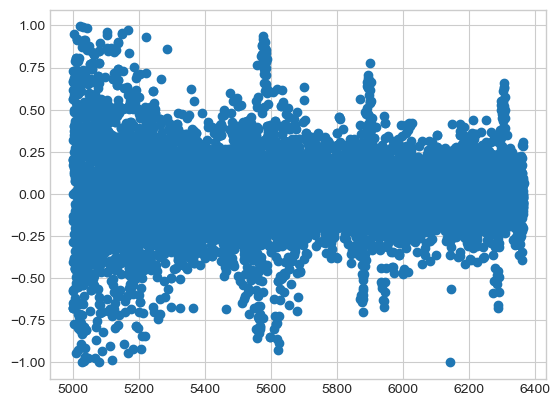

low 6366.666666666667
high 7733.333333333334
mean flux -0.00028681567915579925


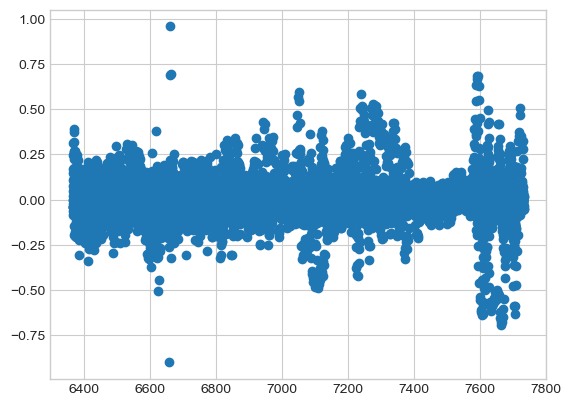

low 7733.333333333334
high 9100.0
mean flux 0.0026435747206378594


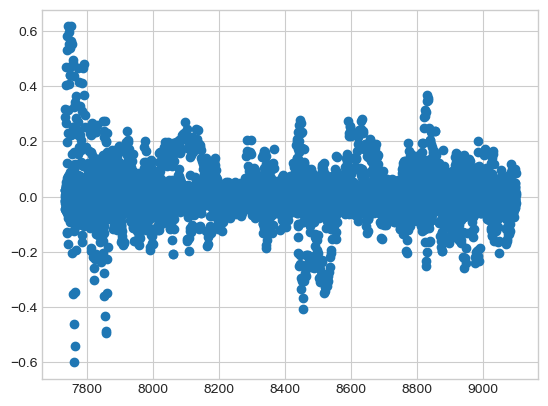

In [288]:
delim(5000,9100, 1000, datos2)

In [77]:
delim(40, 100, 500)

In [ ]:
for i in letras:


In [37]:
mean_f = df2.filter(regex='flux').mean(axis=0)

flux_qa    -0.007353
flux_qa3   -0.001816
flux_qb    -0.009209
flux_qb3   -0.002249
flux_qc    -0.014998
flux_qc3   -0.002264
flux_qd     0.008054
flux_qd3   -0.001945
flux_qe     0.000280
flux_qe3   -0.002627
flux_qf3    0.004143
flux_qg3   -0.012873
flux_qh3    0.003452
flux_ua    -0.001725
flux_ua3   -0.006417
flux_ub    -0.001079
flux_ub3   -0.001079
flux_uc    -0.000680
flux_uc3   -0.002389
flux_ud    -0.002078
flux_ud3    0.003328
flux_ue     0.005131
flux_ue3    0.003656
flux_uf3    0.000537
flux_ug3   -0.002550
flux_uh3    0.002189
dtype: float64